# Analisis de tipo de variables:
1. *Hotel*: Cualitativo Nominal
2. *Lead time*: Cuantitativa discreto
3. *Arrival date year*: Cuantitativa discreto
4. *Arrival date month*: Cualitativa Nominal
5. *Arrival date week number*: Cuantitativa discreto
6. *Arrival date day of month*: Cuantitativa discreto
7. *Stays in weekend nights*: Cuantitativa discreto
8. *Stays in week nights*: Cuantitativa discreto
9. *Adults*: Cuantitativa discreto
10. *Children*: Cuantitativa discreto
11. *Babies*: Cuantitativa discreto
12. *Meal*: Cualitativa Ordinal
13. *Country*: Cualitativa Nominal
14. *Market Segment*: Cualitativa Nominal
15. *Distribution Channel*: Cualitativa Nominal
16. *Is Repeated Guest*: Cualitativa Nominal
17. *Previous Cancellations*: Cuantitativa Discreto
18. *Previous Bookings Not Canceled*: Cuantitativa Discreto
19. *Reserved Room Type*: Cualitativa Nominal
20. *Assigned room type*: Cualitativa Nominal
21. *Booking changes*: Cuantitativa Discreto
22. *Deposit type*: Cualitativa Nominal
23. *Agent*: Cualitativa Nominal
24. *Company*: Cualitativa Nominal
25. *Days in waiting list*: Cuantitativo Discreto
26. *Customer type*: Cualitativa Nominal
27. *ADR*: Cuantitativa continuo
28. *Required car parking spaces*: Cuantitativa Discreto
29. *Total of special requests*: Cuantitativa Discreto
30. *ID*: Cualitativa Nominal
31. Is canceled: Cualitativa Nominal

# Preparacion:

Importamos las librerias a utilizar y cargamos el CSV en memoria. Trabajaremos con una copia del CSV para no alterar los datos originales.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

dsHotel = pd.read_csv('hotels_train.csv')
dsHotelCopy = dsHotel.copy()

# Recoleccion de estadisticas de variables cuantitativas
Se obtienen y muestran ciertas estadisticas generales de todas las variables cuantitativas del set de datos.

In [288]:
variablesCuantitativas = ["lead_time", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "required_car_parking_spaces", "total_of_special_requests"]
medianas = []
medias = []
modas = []
minimos = []
maximos = []

for variableCuantitativa in variablesCuantitativas:
  medianas.append(dsHotelCopy[variableCuantitativa].median().round(0)) #Mediana
  medias.append(dsHotelCopy[variableCuantitativa].mean().round(0))     #Media (Valor promedio)
  modas.append(dsHotelCopy[variableCuantitativa].mode()[0].round(0))   #Moda
  minimos.append(dsHotelCopy[variableCuantitativa].min())              #Minimo
  maximos.append(dsHotelCopy[variableCuantitativa].max())              #Minimo

medianas.append(dsHotelCopy['adr'].median().round(3))
medias.append(dsHotelCopy['adr'].mean().round(3))
modas.append(dsHotelCopy['adr'].mode()[0].round(3))
minimos.append(dsHotelCopy['adr'].min().round(3))
maximos.append(dsHotelCopy['adr'].max().round(3))

variablesCuantitativas.append("adr")

print("ESTADISTICAS GENERALES DE VARIABLES CUANTITATIVAS:")
estadisticas = {'Mediana': pd.Series(medianas,
          index = variablesCuantitativas),

         'Media': pd.Series(medias,
          index=variablesCuantitativas),

         'Moda': pd.Series(modas,
          index= variablesCuantitativas),

         'Minimo': pd.Series(minimos,
          index= variablesCuantitativas),

         'Maximo': pd.Series(maximos,
          index= variablesCuantitativas)
         }

estadisticasVariablesCuantitativas = pd.DataFrame(estadisticas,  index = variablesCuantitativas)
estadisticasVariablesCuantitativas


ESTADISTICAS GENERALES DE VARIABLES CUANTITATIVAS:


,Mediana,Media,Moda,Minimo,Maximo
lead_time,78.0,112.000,0.0,0.00,629.0
arrival_date_year,2016.0,2016.000,2016.0,2015.00,2017.0
arrival_date_week_number,28.0,27.000,33.0,1.00,53.0
arrival_date_day_of_month,16.0,16.000,17.0,1.00,31.0
stays_in_weekend_nights,1.0,1.000,0.0,0.00,16.0
stays_in_week_nights,2.0,3.000,2.0,0.00,40.0
adults,2.0,2.000,2.0,0.00,55.0
children,0.0,0.000,0.0,0.00,10.0
babies,0.0,0.000,0.0,0.00,9.0
previous_cancellations,0.0,0.000,0.0,0.00,26.0


# Recoleccion de estadisticas de variables cualitativas
Se obtienen y muestran ciertas estadisticas generales de todas las variables cuantitativas del set de datos.

In [ ]:
amountOfRows = len(dsHotelCopy)
variablesCualitativas = ["hotel", "country", "arrival_date_month", "meal", "market_segment", "distribution_channel", "is_repeated_guest", "reserved_room_type", "assigned_room_type", "deposit_type", "agent", "company", "customer_type", "id", "is_canceled"]

print("TOP 5 VALORES MAS COMUNES DE CADA VARIABLE CUALITATIVA:")
for variableCualitativa in variablesCualitativas:
  variableTopValues = dsHotelCopy[variableCualitativa].value_counts().head(5)
  i = 0
  print(variableCualitativa)

  for topValue in variableTopValues:
    print(str(i + 1) + ". Value: " + str(variableTopValues.index[i]) + " - Times repeated: " + str(topValue) + " - Percentage of total: " + str(round(((topValue * 100) / amountOfRows), 2)))
    i = i + 1
  print()

TOP 5 VALORES MAS COMUNES DE CADA VARIABLE CUALITATIVA:
hotel
1. Value: City Hotel - Times repeated: 42129 - Percentage of total: 68.05
2. Value: Resort Hotel - Times repeated: 19784 - Percentage of total: 31.95

country
1. Value: PRT - Times repeated: 27950 - Percentage of total: 45.14
2. Value: GBR - Times repeated: 5733 - Percentage of total: 9.26
3. Value: FRA - Times repeated: 4809 - Percentage of total: 7.77
4. Value: ESP - Times repeated: 4210 - Percentage of total: 6.8
5. Value: DEU - Times repeated: 3312 - Percentage of total: 5.35

arrival_date_month
1. Value: August - Times repeated: 7176 - Percentage of total: 11.59
2. Value: July - Times repeated: 6524 - Percentage of total: 10.54
3. Value: May - Times repeated: 6159 - Percentage of total: 9.95
4. Value: April - Times repeated: 5878 - Percentage of total: 9.49
5. Value: October - Times repeated: 5863 - Percentage of total: 9.47

meal
1. Value: BB - Times repeated: 47837 - Percentage of total: 77.26
2. Value: HB - Times rep

# Analisis de correlacion entre variables
Se grafica en un heatmap los indices de correlacion entre las variables. Podemos destacar las siguientes correlaciones:

**-CORRELACIONES POSITIVAS:**
1.   *Agent* y *Company* - Indice de correlacion:  0.51
2.   *Stays_in_week_nights* y *Stays_in_weekend_nights* - Indice de correlacion:  0.49

**-CORRELACIONES NEGATIVAS:**
1.   *Arrival_date_year* y *Arrival_date_week_number* - Indice de correlacion: -0.54

**-OTRAS CORRELACIONES MAS LEVES:**
1.   *is_repeated_guest* y *previous_bookings_not_canceled* - Indice de correlacion:  0.41
2.   *children* y *adr*  - Indice de correlacion:  0.35
3.   *lead_time* y *is_canceled* - Indice de correlacion: 0.29

**-CORRELACIONES DESTACABLES CON VARIABLE *TARGET*:**
1. *lead_time* y *is_canceled* - Indice de correlacion: 0.29
2. *total_of_special_requests* y *is_canceled* - Indice de correlacion: -0.24
3. *required_car_parking_spaces* y *is_canceled* - Indice de correlacion: -0.23

**Parece** ser que:

-A mayor lead time del cliente, mayor probabilidad de cancelamiento de reserva.

-A mayor cantidad de pedidos especiales hechos por el cliente, menor probabilidad de cancelamiento de reserva.

-A mayor cantidad de espacios para estacionamiento de autos requeridos por el cliente, menor probabilidad de cancelamiento de reserva.

<ipython-input-184-98ec6faed255>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrizDeCovarianza = dsHotelCopy.cov()
<ipython-input-184-98ec6faed255>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrizDeCorrelacion = dsHotelCopy.corr()


<Axes: >

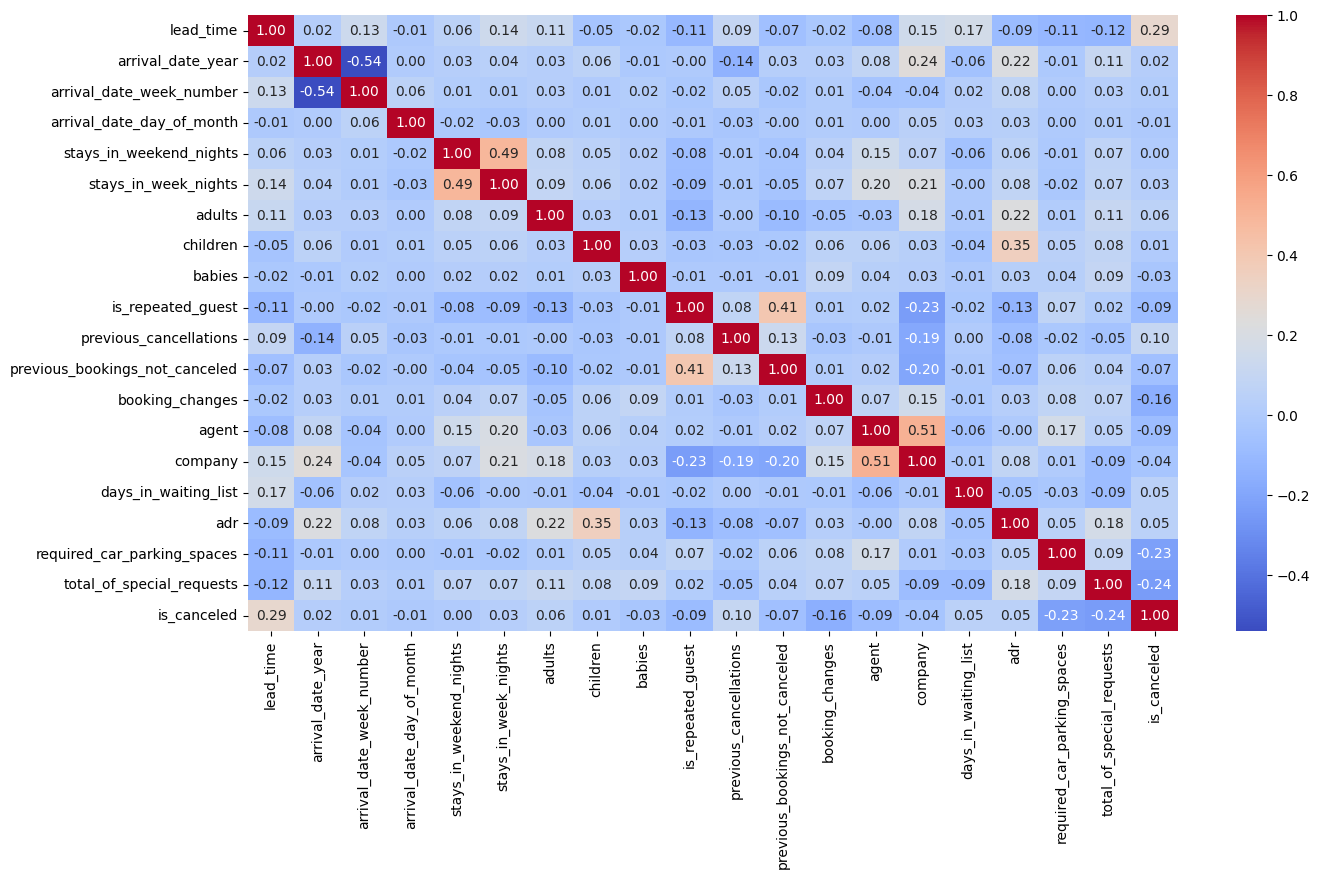

In [ ]:
matrizDeCovarianza = dsHotelCopy.cov()
matrizDeCorrelacion = dsHotelCopy.corr()

plt.figure(figsize = (15,8))
sns.heatmap(matrizDeCorrelacion, annot = True, cmap = 'coolwarm', fmt = '.2f')

#Analisis de distribucion de variables
Aunque previamente se analizo los porcentajes de distribucion de los principales valores de las variables cualitativas, tambien se grafican las distribuciones de algunas de las variables principales para facilitar su analisis.



<Axes: title={'center': 'Reservas por hotel'}, xlabel='Hotel', ylabel='Cant. Reservas'>

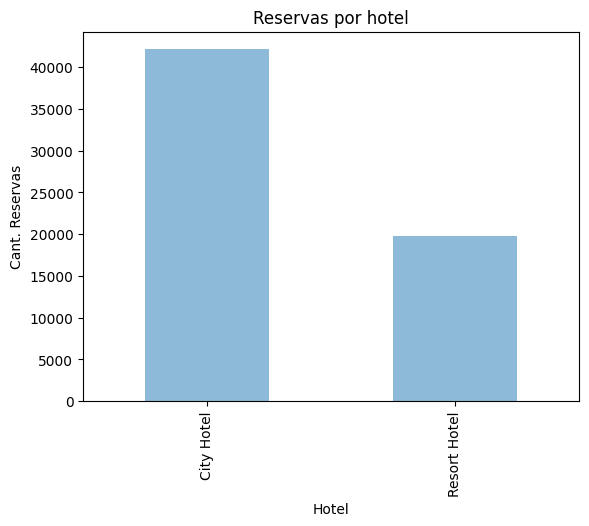

In [ ]:
dsHotelCopy["hotel"].value_counts().plot.bar(alpha=0.5 , title="Reservas por hotel" , xlabel="Hotel" , ylabel="Cant. Reservas")

([<matplotlib.patches.Wedge object at 0x7f0b4b214550>, <matplotlib.patches.Wedge object at 0x7f0b4cd96020>], [Text(-0.1673002789044158, 1.0872031165695326, 'Cancelled'), Text(0.1673002789044159, -1.0872031165695326, 'Not Cancelled')], [Text(-0.09125469758422679, 0.5930198817651996, '54.9%'), Text(0.09125469758422684, -0.5930198817651996, '45.1%')])


Text(0.5, 1.0, 'City Hotel Cancellation Rate')

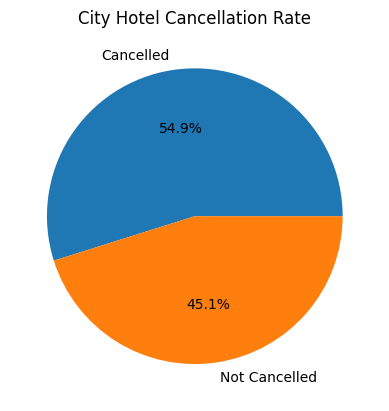

In [ ]:
labels = ["Cancelled", "Not Cancelled"]

#City Hotel
amountOfReservesInCityHotel = len(dsHotelCopy[dsHotelCopy['hotel'] == "City Hotel"])
amountOfCancelledReservesInCityHotel = len(dsHotelCopy[(dsHotelCopy['hotel'] == "City Hotel") & (dsHotelCopy['is_canceled'] == 1)])
amountOfNotCancelledReservesInCityHotel = amountOfReservesInCityHotel - amountOfCancelledReservesInCityHotel

dataCityHotel = [amountOfCancelledReservesInCityHotel, amountOfNotCancelledReservesInCityHotel]

fig, ax = plt.subplots()
print(ax.pie(dataCityHotel, labels=labels, autopct='%1.1f%%'))
plt.title('City Hotel Reserve Cancellation Rate')

([<matplotlib.patches.Wedge object at 0x7f0b4ae52e00>, <matplotlib.patches.Wedge object at 0x7f0b4b217b80>], [Text(0.35394175834559904, 1.0415014314436757, 'Cancelled'), Text(-0.3539417583455996, -1.0415014314436757, 'Not Cancelled')], [Text(0.19305914091578127, 0.5680916898783686, '39.6%'), Text(-0.19305914091578158, -0.5680916898783684, '60.4%')])


Text(0.5, 1.0, 'Resort Hotel Reserve Cancellation Rate')

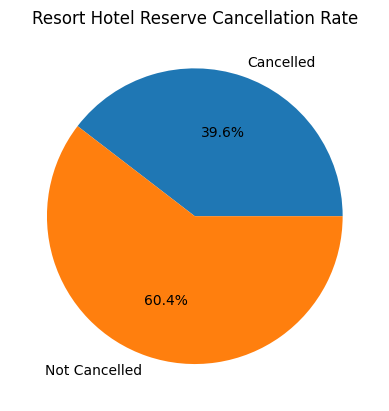

In [ ]:
amountOfReservesInResortHotel = len(dsHotelCopy[dsHotelCopy['hotel'] == "Resort Hotel"])
amountOfCancelledReservesInResortHotel = len(dsHotelCopy[(dsHotelCopy['hotel'] == "Resort Hotel") & (dsHotelCopy['is_canceled'] == 1)])
amountOfNotCancelledReservesInResortHotel = amountOfReservesInResortHotel - amountOfCancelledReservesInResortHotel

#Resort hotel
dataResortHotel = [amountOfCancelledReservesInResortHotel, amountOfNotCancelledReservesInResortHotel]

fig, ax = plt.subplots()
print(ax.pie(dataResortHotel, labels=labels, autopct='%1.1f%%'))
plt.title('Resort Hotel Reserve Cancellation Rate')


<Axes: title={'center': 'Grafico de Reservas canceladas'}, xlabel='Cancelado (1 = True)', ylabel='Cant. Reservas'>

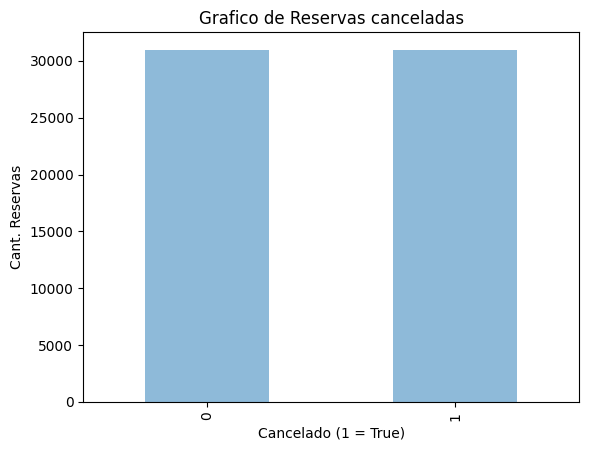

In [ ]:
dsHotelCopy["is_canceled"].value_counts().plot.bar(alpha=0.5 , title="Reservas canceladas" , xlabel="Cancelado (1 = True)" , ylabel="Cant. Reservas")

<Axes: title={'center': 'Grafico de requerimientos especiales solicitados'}, xlabel='Cantidad de solicitudes especiales', ylabel='Cant. Reservas'>

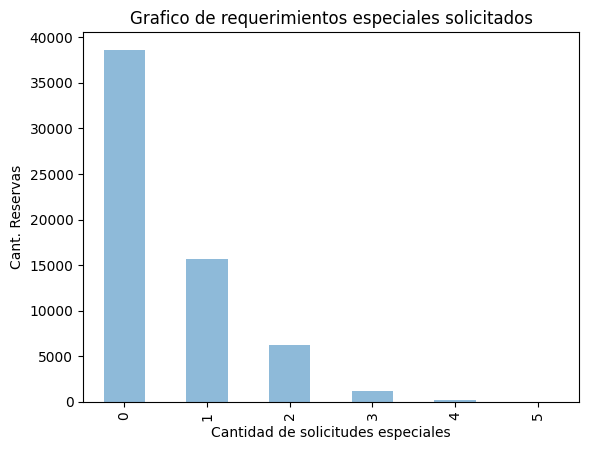

In [ ]:
dsHotelCopy["total_of_special_requests"].value_counts().plot.bar(alpha=0.5 , title="Requerimientos especiales solicitados" , xlabel="Cantidad de solicitudes especiales" , ylabel="Cant. Reservas")

[Text(0.5, 1.0, 'Reservas realizadas en cada semana del año'),
 Text(0.5, 0, 'Semana del año'),
 Text(0, 0.5, 'Cant. Reservas')]

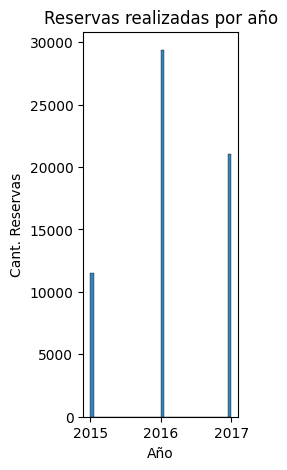

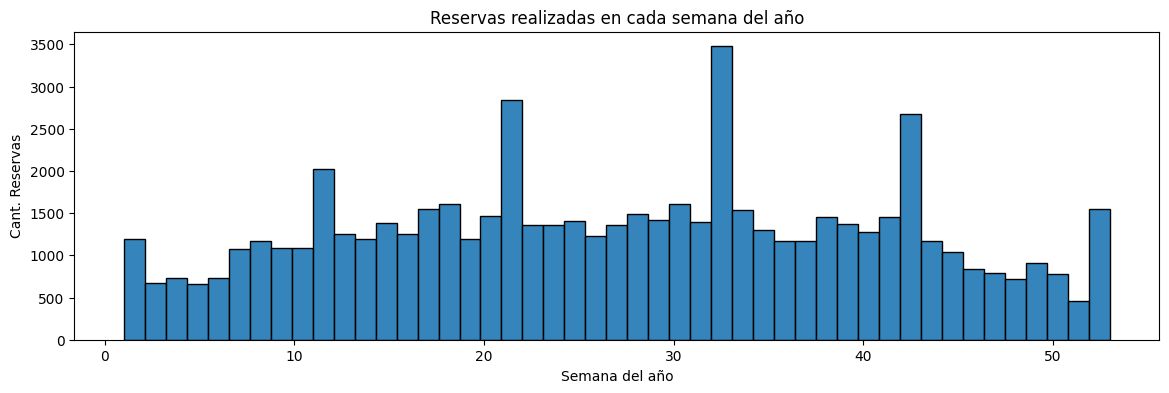

In [ ]:
plt.figure(figsize = (2,5))
sns.histplot(data=dsHotelCopy['arrival_date_year'], alpha = 0.9).set(title="Reservas realizadas por año",xlabel="Año",ylabel="Cant. Reservas")


plt.figure(figsize = (14,4))
sns.histplot(data=dsHotelCopy['arrival_date_week_number'], alpha = 0.9).set(title="Reservas realizadas en cada semana del año",xlabel="Semana del año",ylabel="Cant. Reservas")